# Classification

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

* Supervised ML. You give your algorithm data and expected outcome. Algorithm learns that and then tries to predict outcome for new/unseen data based on learned values.

* Regression: You try to predict continuous Dependent variable (numbers)
* Classification: You try to predict discrete Dependent variable, with few values.

* In classification, this prediction is usually some sort of category or class of data.
* Like:
    * Email is spam or not?
    * Deal is good or not?
    * Image is of which Animal? Cat, Dog, or Horse?

* Types:
    1. Binary Classification: True or False, Yes or No, 0 or 1.
        * Logistic Regression - Only for Binary classification
        * Support Vector Machine (SVM) - Only for Binary classification
        * KNN 
        * Decision Trees
        * Naive Bayes
    2. Multiclass Classification: Whose Face is this? Which Animal is it? Which digit it is?
        * KNN
        * Decision Trees
        * Random Forests
        * Naive Bayes
        * Gradient Boosting
    3. Imbalanced Classification: Is this Transaction valid? Is this number Outlier?
        * Accuracy is not the right parameter to judge such classes.
        * One class is usually very high then another.
        * Specialised Techniques for Sampling, Algorithms and /or Estimation Measures are required to deal with these cases.
    4. Ordinal Classification:
        * Where classes have a particular order like High, Medium, Low.
        * Any model that can return the probabilities of classification will work. 
        * We can't use multiclass classification as that will loose ordinality in data.
        

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
admissions = pd.read_csv('../admissions.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admissions['Chance of Admit '].head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [8]:
admissions.info()
list(admissions.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [9]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
admissions.drop('Serial No.', axis=1, inplace=True)
admissions.loc[admissions['Chance of Admit ']>=0.72,'Admitted']=1
admissions.loc[admissions['Chance of Admit ']<0.72,'Admitted']=0
admissions['Admitted']=admissions['Admitted'].astype(np.int64)

admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [11]:
admissions.nunique()

# UR, SOP and LOR - Categorical - we should convert them to numericals without ordering
# Research - WE should see, what to do with it?
# We have to find importance of metrics

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
Admitted               2
dtype: int64

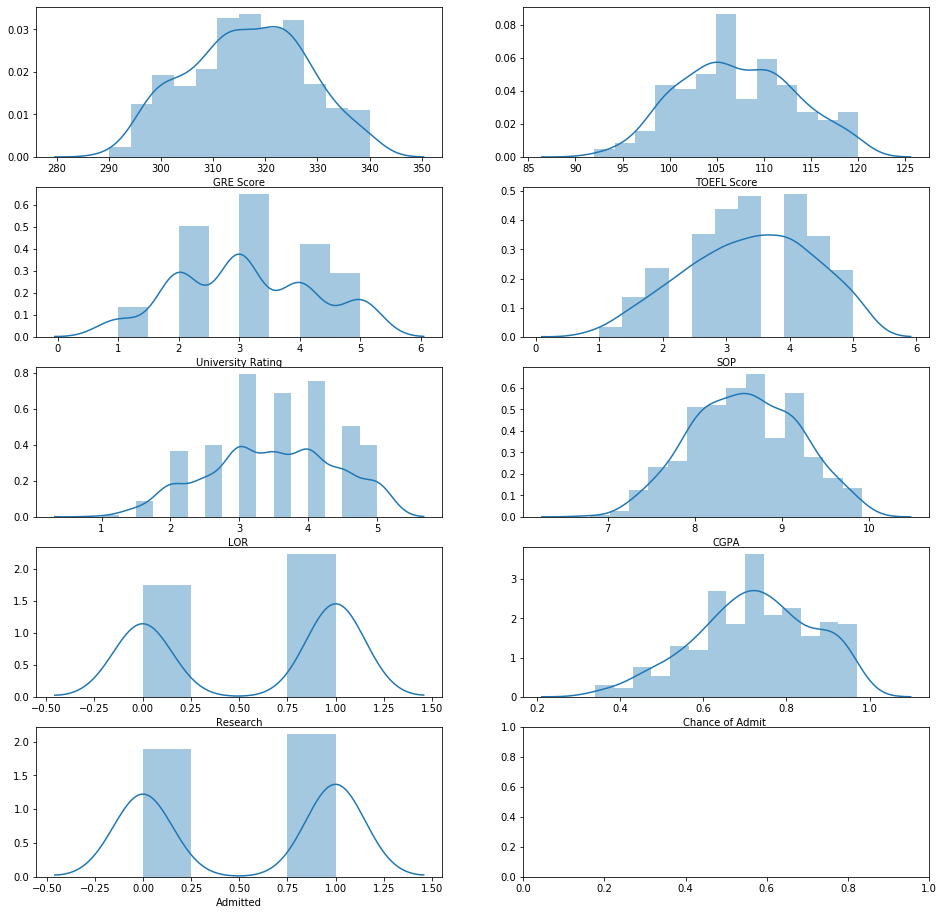

In [12]:
fig, ax = plt.subplots(5,2, figsize=(16,16))
for idx, column in enumerate(list(admissions.columns)):
    sns.distplot(admissions[column], ax=ax[idx//2, idx%2])

plt.show()

In [6]:
admissions[admissions['Chance of Admit ']< 0.5].count()

GRE Score            37
TOEFL Score          37
University Rating    37
SOP                  37
LOR                  37
CGPA                 37
Research             37
Chance of Admit      37
Admitted             37
dtype: int64

In [7]:
print(admissions[(admissions['Chance of Admit ']>= 0.5) & (admissions['Chance of Admit '] <=0.7)].count())
print("*" * 15)
print(admissions[admissions['Chance of Admit '] >  0.7].count())

GRE Score            176
TOEFL Score          176
University Rating    176
SOP                  176
LOR                  176
CGPA                 176
Research             176
Chance of Admit      176
Admitted             176
dtype: int64
***************
GRE Score            287
TOEFL Score          287
University Rating    287
SOP                  287
LOR                  287
CGPA                 287
Research             287
Chance of Admit      287
Admitted             287
dtype: int64


### How to decided a Decision Boundary?

1st thing you should do is: Don't assume anything.
Ask business what's their take on this? chances are 1 of the 2 cases might arise:
    1. all with above a certain threshold are admitted to the uni. Good. Our task is easier now. 
    2. Even after prob higher than threshold some are admitted and some are not.
 
 case 2 is problematic. It means 1: we are missing something. May be this is initial score. then they have interview rounds 
 2. May be, some decided not to choose this university. In that case, Chance f Admission should not be your dependedent variable, You should create new dependent variable admitted or not.


Since in this case, we can't go back and take this input, we have to answer the question on our own.
So, Let's assume that 50% of these students get admitted. so, we take value 50 percentile as our threshold.
If we assume that 10% of these students got admission, then we take value at 90% as our threshold.

## Logistic Regression

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

    * Also Know as logit Regression, Maximum entropy Classifier, Log-Linear Classifier.
    * It is by default a binary classifer i.e., can predict only 0 or 1 values, but it's variations can work on multiple classes.
    * An Analogy for Logistic Regression can be:
        ** It applies the output of linear model to Sigmoid function to give final output, so that Binary output can be obtained.
        
        sigmoid function:
            y = sig(t) = 1 / [1 + (e ^ (-t))]  =  (e ^ t) / [(e ^ t) + 1]
        
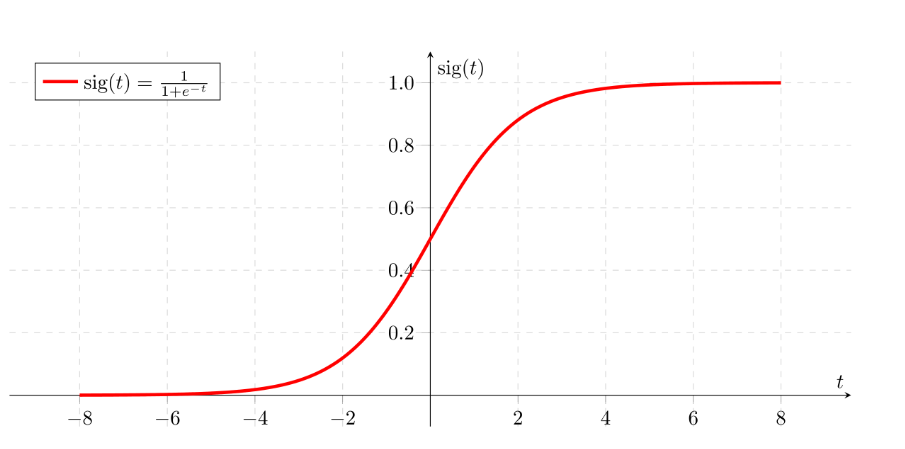
        
        If t goes to + infinity, sig(t) becomes 1.  If t goes to - infinity, sig(t) becomes -1
        
    * Unlike linear progression, which tries to predict the output value y using linear summation of coefficients and features, Logistic Regression uses it to predict the log probabilty of True class, i.e., where value will be 1.
         t = log( p(y=1) / (1 - p(y=1)) = A0 + A1x1+ A2x2 + ... + Anxn
         
         y = sig(t)
   
    * Assumptions:
         1. Each Independent variable group should have exactly 1  value for each case.
         1. Your output variable shoule be noise free i.e. your ouput variable should have only classes you are trying to predict and/or values you are trying to convert to binary should be in given range. Any Outliers or misclassified results can lead to wrong results.
         2. Multicollinearity: There should not be highly correlated inputs.
         3. Maximum Likelihood Estimation Logistic Regression might fail to converge if your data contains multicollinearity.
 
 
###### NOTE on Logistic Regression Function in SciKit Learn module:
    * It includes regularisation by default. 
    * It can be used for Multi-Class Classification.

In [8]:
from sklearn.linear_model import LogisticRegression

C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [61]:
X = admissions.iloc[:,:-1]
y = admissions[['Admitted']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [63]:
X1_train = X_train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]
X1_test = X_test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]

In [64]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
247,311,104,2,2.5,3.5,8.48,0,0.71
390,314,102,2,2.0,2.5,8.24,0,0.64
186,317,107,3,3.5,3.0,8.68,1,0.84
484,317,106,3,3.5,3.0,7.89,1,0.73
139,318,109,1,3.5,3.5,9.12,0,0.78


In [65]:
mlr = LogisticRegression()
mlr.fit(X1_train, y_train)

y_pred = mlr.predict(X1_test)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
mlr2 = LogisticRegression(solver='liblinear')
mlr2.fit(X1_train, y_train)

y_pred = mlr2.predict(X1_test)

print("Training Accuracy : ", mlr2.score(X1_train, y_train)*100)
print("Testing Accuracy : ", mlr2.score(X1_test, y_test)*100)

Training Accuracy :  78.0
Testing Accuracy :  78.0


C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
X2_train = X_train[['GRE Score', 'TOEFL Score', 'CGPA']]
X2_test = X_test[['GRE Score', 'TOEFL Score', 'CGPA']]

In [14]:
mlr3 = LogisticRegression()
mlr3.fit(X2_train, y_train)

y_pred = mlr3.predict(X2_test)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()

X1_scaled_train = rb.fit_transform(X1_train)
X1_scaled_test = rb.transform(X1_test)

In [16]:
mlr4 = LogisticRegression()
mlr4.fit(X1_scaled_train, y_train)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_mlr4 = mlr4.predict(X1_scaled_test)

In [ ]:
sns.pairplot(data=admissions, hue='Admitted')
    #x_vars=['GRE Score', 'TOEFL Score', 'CGPA'], y_vars = ['University Rating', 'SOP', 'LOR ', 'Research'])

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(16,16))
for idx, column in enumerate(list(admissions.columns)):
    sns.boxplot(admissions[column], ax=ax[idx//2, idx%2])

plt.show()

In [ ]:
corr = admissions.corr()
corr

In [ ]:
plt.figure(figsize=(14, 10))
plt.title('Data Correlation')
sns.heatmap(corr, annot=True, square = True)

In [17]:
from sklearn.feature_selection import mutual_info_classif

score = mutual_info_classif(X,y)
score_percent =  score/np.max(score) * 100


msg = '{:<20} : {:^8.4f} : {:.2f}'
for column, value, percent in zip(list(X.columns), score, score_percent):
    print(msg.format(column, value, percent))

C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ikhurana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GRE Score            :  0.3556  : 51.34
TOEFL Score          :  0.2599  : 37.53
University Rating    :  0.1571  : 22.69
SOP                  :  0.1931  : 27.89
LOR                  :  0.1155  : 16.68
CGPA                 :  0.3268  : 47.19
Research             :  0.1206  : 17.42
Chance of Admit      :  0.6926  : 100.00


In [18]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k = 3)
selectedX = selector.fit_transform(X.iloc[:,:-1], y)

msg2 = '{:<20} : {:^4} : {:.4f}'
for column, status, value in zip(list(X.columns), selector.get_support(), selector.scores_):
    print(msg2.format(column, status, value))

GRE Score            :  1   : 0.3449
TOEFL Score          :  1   : 0.2704
University Rating    :  0   : 0.1831
SOP                  :  0   : 0.2090
LOR                  :  0   : 0.1675
CGPA                 :  1   : 0.3304
Research             :  0   : 0.1198


C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# ['GRE Score', 'TOEFL Score', 'CGPA']
selectedX

array([[337.  , 118.  ,   9.65],
       [324.  , 107.  ,   8.87],
       [316.  , 104.  ,   8.  ],
       ...,
       [330.  , 120.  ,   9.56],
       [312.  , 103.  ,   8.43],
       [327.  , 113.  ,   9.04]])

In [20]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(selectedX, y, test_size = 0.20, random_state=5)

mlr3 = LogisticRegression()
mlr3.fit(Xs_train, ys_train)

y_pred = mlr3.predict(Xs_test)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Testing Accuracy : ", mlr3.score(Xs_test, y_test)*100)
print("Training Accuracy : ", mlr3.score(Xs_train, y_train)*100)

### k-Nearest Neighbor(kNN)
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

* It simply works on the principle of similar things are closer to each other.
* Instance based or Lazy Learning i.e., all the computation is done at the execution of function. So, Unlike learning a model from the given data, it learns(memorises) the data itself.
* Can be used for both classification and Regression.
* For classification, output is the majority class in k-nearest neighbors.
* For Regression, Output is the average of the values of k-nearest neighbors.
* Since kNN works on some distance measure, you need to define one. Common distance measures are:
    1. For Continuous Output Variable: Euclidean Distance
    2. For Categorical Output Variable: Hamming Distance or Cosine Distance.
    * But you can define your own distance function as well.
* Noisy features(Irrelevant features) can significantly degrade the performance of kNN Model. Usually, Features selected through mutual information works best.

* NOTE:
    1. If you have more than 10-features, either reduce the features using some dimensionality reduction technique or don't use.
    2. We usually choose odd k to prevent any tie situations.
    3. Choice of k is very critical – A small value of k means that noise will have a higher influence on the result. A large value make it computationally expensive and kinda defeats the basic philosophy behind KNN (that points that are near might have similar densities or classes ) .A simple approach to select k is set k = n^(1/2).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(Xs_train, ys_train)

knn_pred = knn_model.predict(Xs_test)

In [ ]:
print("Training Accuracy : ", knn_model.score(Xs_train, y_train)*100)
print("Testing Accuracy : ", knn_model.score(Xs_test, y_test)*100)

## Support Vector Machines

* Also called Wide Street Algorithm.
* It only works for 2 classes one class is treated as positive (often as +1) and other is treated as negative (often as -1).
* The idea of Support Vector machines is very simple. Given a set of points divided into 2 classes, the best decision boundary will be the one which is equidistant from 2 (or more) points of 2 classes that are closest to each other.
    i.e.
        o--oooo---o---|---xx---x-xxx-xx
     Here the middle line will be the best decision boundary.

*  This Decision boundary is called as Hyperplane. For n-dimensions we have n-1 dimensional Hyperplane.
    * For 1-dimension, we have 0-dimensional Hyerplane (known as point)
    * For 2-dimensions, we have 1-dimensional Hyperplane (known as line)
    * For 3-Dimensions, we have 2-Dimensional Hyper plane (known as Plane)
    * For 3+ Dimensions, we call it Hyperplane.

##### How it works??
1. We identify 2 points which belong to different class. These points are known as **"Support Vectors"**
2. Then we try to fit a hyper plane between them.
3. This Hyper plane is fitted in such a way that it's distance from both Support Vectors is equal. This distance is known as **Margin**.
4. The goal of the Support Vector Machine is to find the Hyper Plane for which this margin is maximum. Hence, it is also know as **Maximal Margin Classifier**. It has the similar analogy to a Wider Street.

* The above algorithm will easily work for cases like:
        o--oooo---o------xx---x-xxx-xx

  But what about cases like:
        o--oooo---o-----xx---x-xxx-xx--o-oo-oo---o
  or cases like:
                  x
                x   x
              x   o   x
              x   o   x
                x   x
                  x
  Here, there is no clear decision boundary.

* The above classifier, also known as **Linear Support Vector Classifier/Machine(LSVC/LSVM)** since it's kernel function is Linear.

* Few Kernel Functions that we have are:
1. Linear.
2. Polynomial
3. Radial Basis Function(RBF) Kernel.
* But you can define your own kernel function as well.

* The Kernel Function simply states that if the data is not linearly separable in lower dimension, then we can increase the dimension of the data. In some higher, dimension, it will definitely be Linearly separable.

* Polynomial function uses a degree d, to raise to higher dimension. Like, instead of searching in space (x,y), it searches in space (x2, y).

* RBF, theoretically, finds the Hyperplane in Inifinite Dimensions. In actual, it works like a weighted Nearest neighbors, where the points closer in distance with the nearest points are given more weightage then far away points.


##### The Kernel Trick
* Polynomial and Radial Basis apply a Trick known as **"The Kernel Trick"**.
* As you can imagine the we are doing the calculation in higher dimensions. But, instead of transforming the actual values in higher dimensions, SVM implements the Kernel Trick. For this, SVM calculated the dot(.) product between 2 points as if they are in higher dimension, thus saving on the transformations. Using this trick only, we can make the infinite dimensions in RBF possible.

***Misclassification***

* Consider the example below:

        o--oooo---o------x--o-x---x-xxx-xx
                     a     b c

* Where do you think the decision boundary should be? At a, b or c?
* one will prefer 'a' as it might misclassify few observations, but testing accuracy is expected to be more. It might be that these observations are outliers.

* You can do this, using cross validation(In practice, we use Regularisation parameter of sklearn to specify how much misclassification we allow.

* If regularisation parameter(C) is large, it means one wnats to favor b or c more. Such cases might work on Training dataset well, but can fail on testing dataset.
* A very small value of C might allow for large hyperplane, which might misclassify a lot of observations, thus reducing the accuracy.


In [24]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(Xs_train, ys_train)

svc_pred = svc_model.predict(Xs_test)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print("Training Accuracy : ", svc_model.score(Xs_train, ys_train)*100)
print("Testing Accuracy : ", svc_model.score(Xs_test, ys_test)*100)

Training Accuracy :  84.0
Testing Accuracy :  81.0


In [26]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', gamma='auto')
svc_model.fit(Xs_train, ys_train)

print("Training Accuracy : ", svc_model.score(Xs_train, ys_train)*100)
print("Testing Accuracy : ", svc_model.score(Xs_test, ys_test)*100)

Training Accuracy :  88.25
Testing Accuracy :  82.0


C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.svm import SVC

svc_model = SVC(kernel='poly', degree = 3, gamma='auto', C=3.0)
svc_model.fit(Xs_train, ys_train)

print("Training Accuracy : ", svc_model.score(Xs_train, ys_train)*100)
print("Testing Accuracy : ", svc_model.score(Xs_test, ys_test)*100)

C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy :  87.5
Testing Accuracy :  83.0


### Naive Bayes
https://en.wikipedia.org/wiki/Bayes%27_theorem

* Called Naive because it assumes that all the inputs are independent of each other. But, in reality, that is not the case mostly. For eg:
    1. We know that sales are impacted by the season.
    2. Words in paragraph are not independent. They follow some language rules.

* Naive Bayes is based on Bayes' Theorem
> P(A|B) = [ P(B|A) * P(A) ]/ P(B)    
    * Here,
    * P(A|B) = Probability or likelihood of occuring of A given B has occured. It is conditional probability.
    * P(B|A) = Probability or likelihood of occuring of B given A has occured. It is conditional probability.
    * P(A) and P(B) are probabilities of observing A and B respectively.. They are known as marginal probabilities.

* Assume We have 2 bags with different color balls:
        Bag1: Red - 5 Green - 3 Blue -2 
        Bag2: Red - 3 Blue - 8  Orange - 4  Pink - 5
        
        P(Red | Bag1) : 5/10 = 0.5
        P(Green | Bag1) : 3/10 = 0.3
        P(Blue | Bag1) : 2/10 = 0.2
        
        P(Red | Bag2) : 3/20 = 0.15
        P(Blue | Bag2) : 8/20 = 0.4
        P(Orange | Bag2) : 4/20 = 0.2
        P(Pink | Bag2) : 5/20 = 0.25

        P(Red) = 8/30 = 0.27
        P(Green) = 3/30 = 0.1
        P(Blue) = 10/30 = 0.33
        P(Orange) = 4/30 = 0.13
        P(Pink) = 5/30 = 0.17
        
        P(Bag1|Red) = P(Red | Bag1) * P(Bag1) / P(Red)
                    = 0.5 * 0.5 / 0.27 = 0.25/0.27 = 0.92

* **Applications:**
* Used in Spam filtering, Document classification, Recommender systems

* **Advantages:**
1. They can be extremely fast compared to the other methods.
2. They need very small amount of training data. For this reason, they can be used for very large training data that might not fit in memory, like product reviews.
3. Also, they are less impacted by the curse of dimensionality as each feature can be treated as distributed independently.



In [40]:
from sklearn.naive_bayes import GaussianNB

gb_model = GaussianNB(var_smoothing=0.001)
gb_model.fit(Xs_train, ys_train)

print("Training Accuracy : ", gb_model.score(Xs_train, ys_train)*100)
print("Testing Accuracy : ", gb_model.score(Xs_test, ys_test)*100)

Training Accuracy :  84.75
Testing Accuracy :  86.0


C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.naive_bayes import MultinomialNB

mb_model = MultinomialNB()

mb_model.fit(Xs_train, ys_train)
print("Training Accuracy : ", mb_model.score(Xs_train, ys_train)*100)
print("Testing Accuracy : ", mb_model.score(Xs_test, ys_test)*100)

Training Accuracy :  58.25
Testing Accuracy :  56.00000000000001


C:\Users\ikhurana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Imbalanced Class
* http://www.chioka.in/class-imbalance-problem/

### Confusion Matrix

True Positive (TP) – An example that is **positive** and is classified correctly as **positive**

True Negative (TN) – An example that is **negative** and is classified correctly as **negative**

False Positive (FP) – An example that is **negative** but is classified wrongly as **positive**

False Negative (FN) – An example that is **positive** but is classified wrongly as **negative**

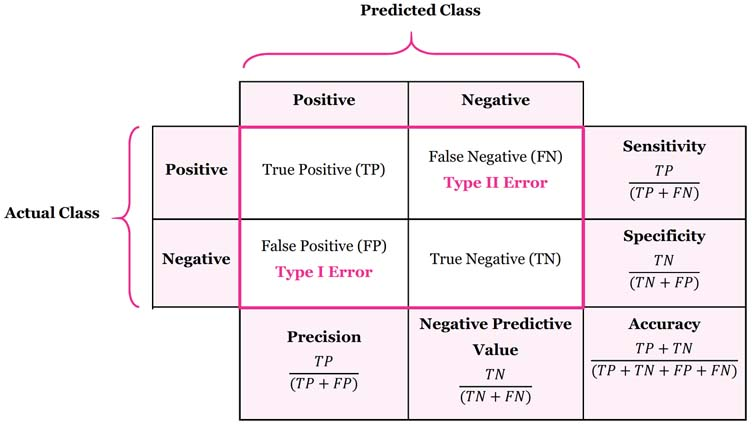
[Source: https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html]


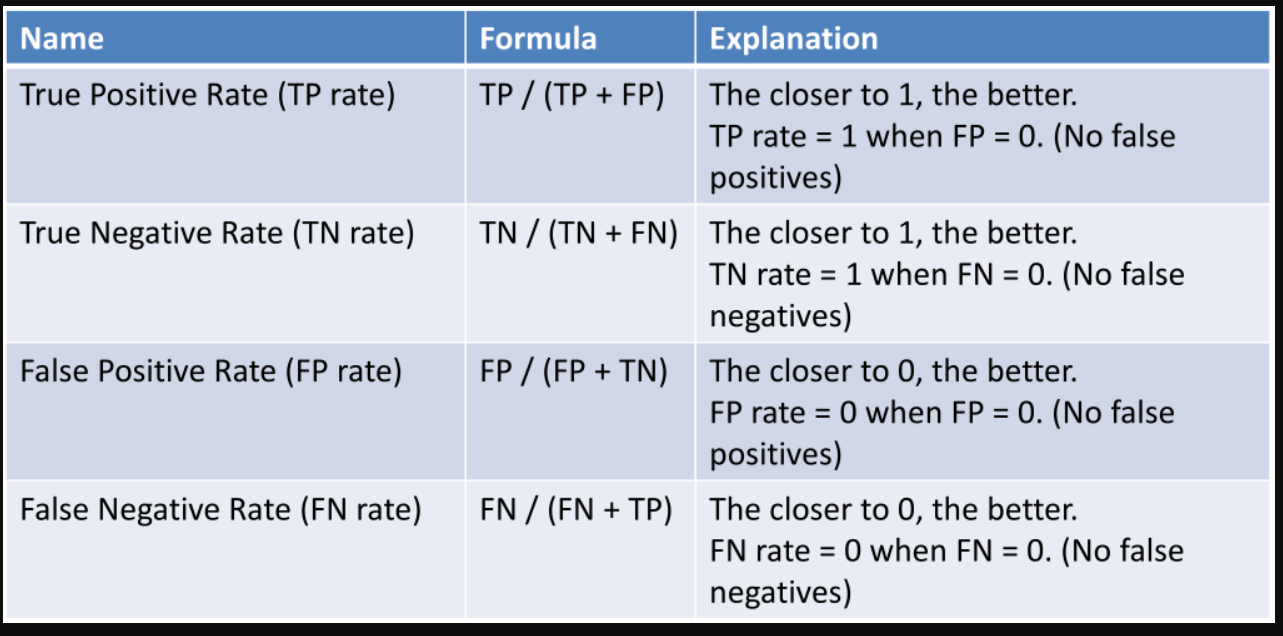

Note:
* Recall(Sesitivity) gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).

* FPR = 1 - Specificity.
* Specificity and Sensitivity(Recall) are inversely proportional.

### Other Evaluation Metrics:
***
**Recall = Sensitivity = True Positive Rate(TPR) = Hit Rate**

**Specificity = Selectivity = True Negative Rate(TNR)**

**Precision = Positive Predicted value**

**False Negative Rate = Miss Rate**

**False Positive Rate = Fall-out**
*** 

* **Precision**: Precision is the estimated probability that a randomly selected retrieved document is relevant.
* **Recall**: Recall is the estimated probability that a randomly selected relevant document is retrieved in a search.


1. **F1 Score**: Harmonic Mean of Precison and Recall.
        F1 Score = 2 * Precision * Recall / (Precision + Recall)
   
   * It simply answers how many instances our model classifies correctly without missing the significant amount of instances
   * Higher the score, better the model is.

2. **AUC (Area under the Curve) ROC (Receivers' Operating Characteristics) curve**
    * ROC is the curve between TPR(Recall or Sensivity) and FPR(Fall-Out)
    * Area under RoC is known as AUC.
    * AUC is the mesure of separability i.e. How well our model was able to separate given classes. Higher the AUC, better the model is at predicting the classes.
        
  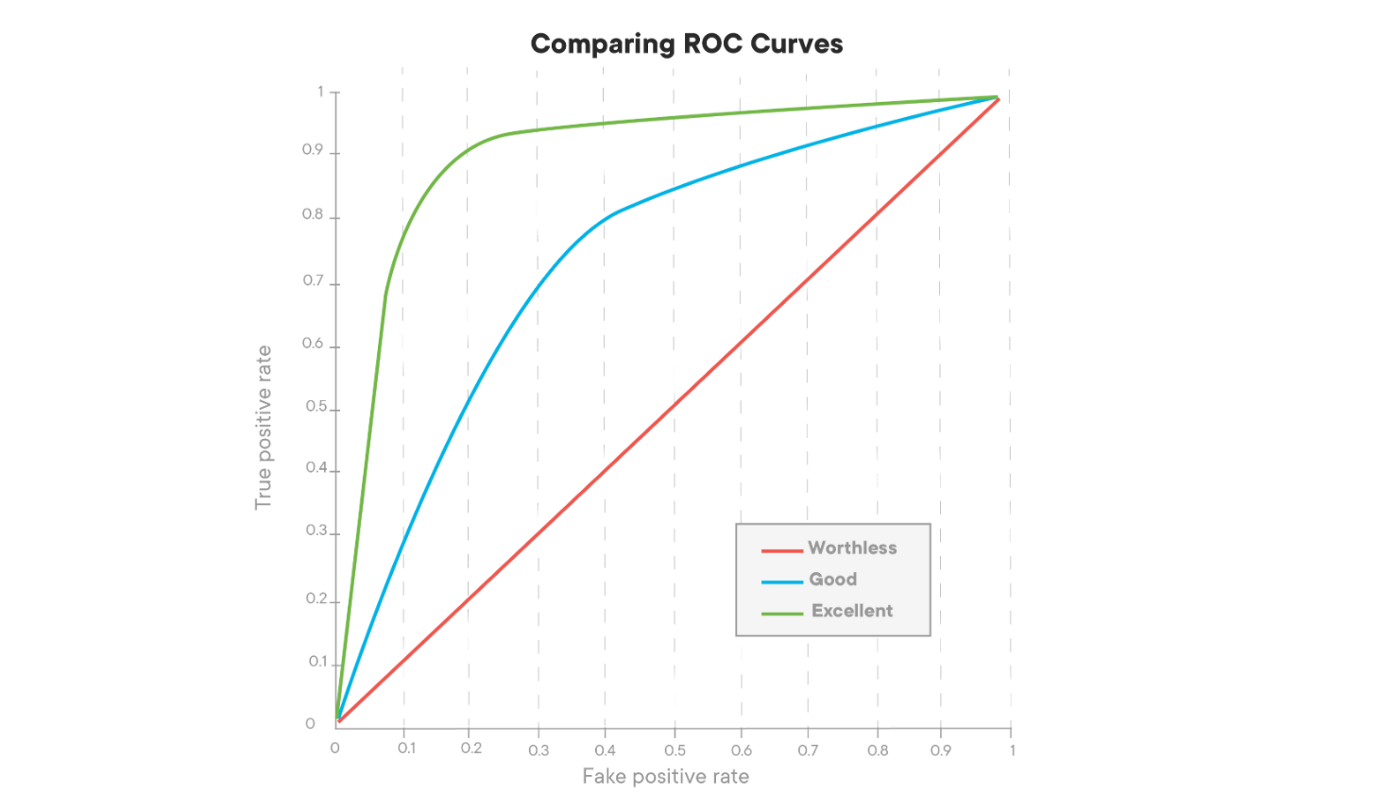

In [76]:
from sklearn import metrics

In [80]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        47
           1       0.82      0.75      0.78        53

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [89]:
print(metrics.confusion_matrix(y_test, y_pred))

[[38  9]
 [13 40]]


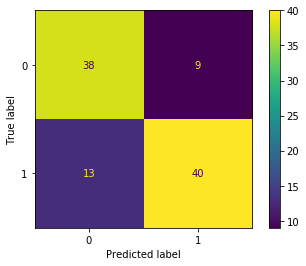

In [90]:
metrics.plot_confusion_matrix(mlr2, X1_test, y_test)

In [84]:
metrics.roc_auc_score(y_test, y_pred)

0.7816138097149741

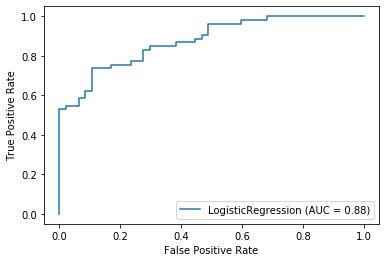

In [86]:
metrics.plot_roc_curve(mlr2, X1_test, y_test)